In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiments_path = "experiments"
run = 0

In [3]:
def read_statistics_data(experiments_path, run):
    path = f"{experiments_path}/run_{run}/statistics"
    files = os.listdir(path)
    dataframes = []
    for f in files:
        df = pd.read_csv(f"{path}/{f}", delimiter='\t')
        df['generation'] = int(f.split(os.sep)[-1].replace('generation_','').replace('.csv',''))
        dataframes.append(df)
    return pd.concat(dataframes).reset_index(drop=True)
    

In [4]:
stats_df = read_statistics_data(experiments_path, run)

In [5]:
stats_df.head(5)

,id,phenotype,fitness,num_epochs,training_time_spent,training_time,is_valid_solution,fitness.1,n_trainable_parameters,n_layers,training_time_spent.1,losses,n_epochs,generation
0,0,layer:pool_max kernel_size:5 stride:2 padding:...,0.503208,36,529.178248,300,True,0.503208,67209138,3,529.178248,"{'train_loss_diagonal': [284.6441650390625, 21...",36,0
1,1,layer:batch_norm input:-1 layer:fc act:relu ou...,0.643203,14,563.493045,300,True,0.643203,68009305,3,563.493045,"{'train_loss_diagonal': [828.5635375976562, 68...",14,0
2,2,layer:dropout rate:0.5796442948827292 input:-1...,0.225569,15,580.338784,300,True,0.225569,69184028,3,580.338784,"{'train_loss_diagonal': [707.431884765625, 799...",15,0


[Text(0, 0, '0')]

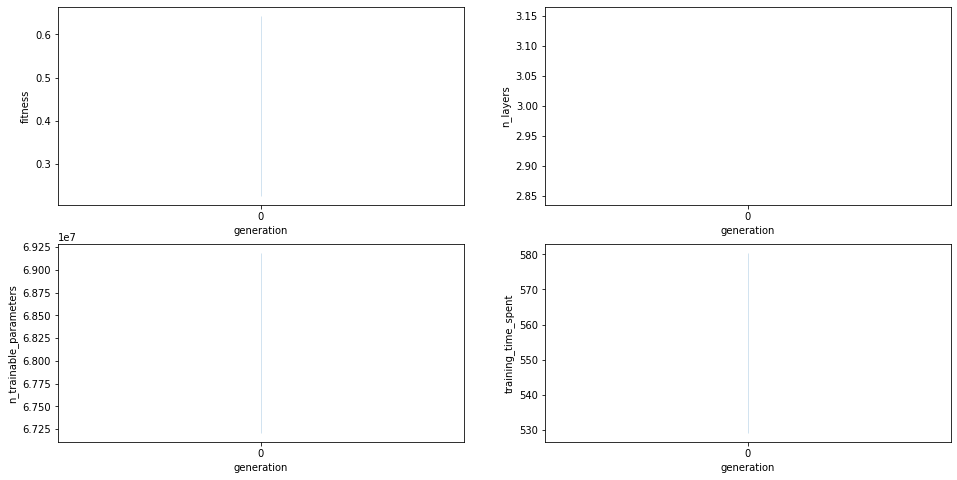

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))

xticks = sorted(stats_df['generation'].unique())

sns.lineplot(x='generation', y='fitness', data=stats_df, ax=axs[0][0])
axs[0][0].set_xticks(xticks)
axs[0][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_layers', data=stats_df, ax=axs[0][1])
axs[0][1].set_xticks(xticks)
axs[0][1].set_xticklabels(xticks)

sns.lineplot(x='generation', y='n_trainable_parameters', data=stats_df, ax=axs[1][0])
axs[1][0].set_xticks(xticks)
axs[1][0].set_xticklabels(xticks)

sns.lineplot(x='generation', y='training_time_spent', data=stats_df, ax=axs[1][1])
axs[1][1].set_xticks(xticks)
axs[1][1].set_xticklabels(xticks)

In [ ]:
# add best overall fitness